C:\Users\ak135\AppData\Local\Temp\ipykernel_17552\1619555231.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scd = pd.read_csv("D:/Internship/Project1/Sudden Cardiac Death Holter Database.csv")


Epoch 1/20
1783/1783 [==============================] - 6s 3ms/step - loss: 0.3003 - accuracy: 0.9261 - val_loss: 0.1181 - val_accuracy: 0.9650
Epoch 2/20
1783/1783 [==============================] - 5s 3ms/step - loss: 0.1308 - accuracy: 0.9617 - val_loss: 0.0959 - val_accuracy: 0.9690
Epoch 3/20
1783/1783 [==============================] - 5s 3ms/step - loss: 0.1104 - accuracy: 0.9662 - val_loss: 0.0824 - val_accuracy: 0.9724
Epoch 4/20
1783/1783 [==============================] - 5s 3ms/step - loss: 0.0990 - accuracy: 0.9692 - val_loss: 0.0741 - val_accuracy: 0.9763
Epoch 5/20
1783/1783 [==============================] - 5s 3ms/step - loss: 0.0923 - accuracy: 0.9718 - val_loss: 0.0707 - val_accuracy: 0.9778
Epoch 6/20
1783/1783 [==============================] - 5s 3ms/step - loss: 0.0881 - accuracy: 0.9728 - val_loss: 0.0679 - val_accuracy: 0.9791
Epoch 7/20
1783/1783 [==============================] - 5s 3ms/step - loss: 0.0850 - accuracy: 0.9737 - val_loss: 0.0664 - val_accuracy:

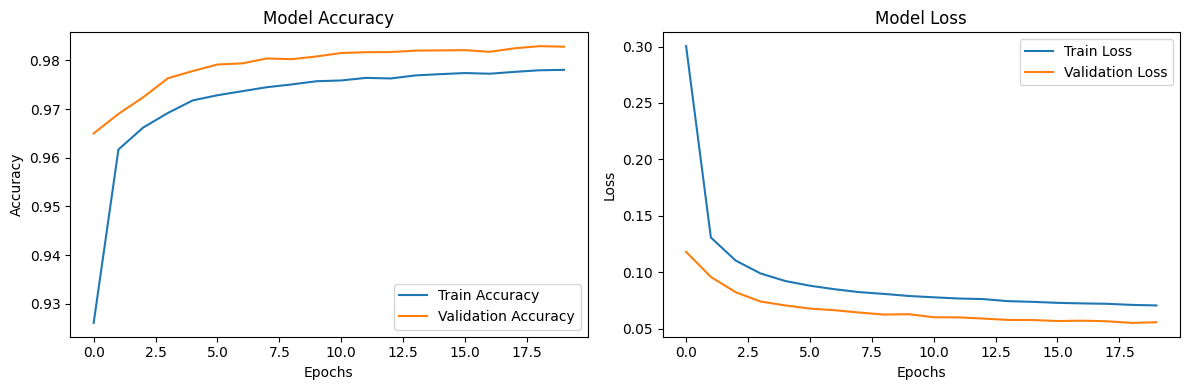

In [4]:
# Loading all the Libraries required for this model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Loading the datasets
df_mitbih = pd.read_csv("D:/Internship/Project1/MIT-BIH Arrhythmia Database.csv")
df_incart = pd.read_csv("D:/Internship/Project1/INCART 2-lead Arrhythmia Database.csv")
df_sv = pd.read_csv("D:/Internship/Project1/MIT-BIH Supraventricular Arrhythmia Database.csv")
df_scd = pd.read_csv("D:/Internship/Project1/Sudden Cardiac Death Holter Database.csv")

# Combining datasets
df = pd.concat([df_mitbih, df_incart, df_sv, df_scd], axis=0)

# Data Preprocessing
df.dropna(inplace=True)
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Feature selection and scaling
features = df.drop(['record', 'type'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
labels = df['type']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, 
    labels, 
    test_size=0.2, 
    random_state=42
)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential([
    # Input layer
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),  
    BatchNormalization(),
    Dropout(0.3),
    
    # Hidden layers
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, 
    y_train_categorical, 
    validation_split=0.2, 
    epochs=20, 
    batch_size=256, 
    verbose=1
)

# Evaluate the model
score = model.evaluate(X_test, y_test_categorical)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")




# Plotting training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
